# CLASSIFICATION PROJECT (CREDIT CARD FRAUD DETECTOR)
### NAME : HaTeeM TaHiR
### REG.NO : 2023-BS-AI-032



## IMPORTING LIBRARIES


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## LOAD DATASET

In [42]:
credit_card_data = pd.read_csv('creditcard.csv')

## PRINTS THE FIRST 5 ROWS OF THE DATASET

In [43]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## PRINT THE LAST 5 ROWS OF THE DASTASET

In [44]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Get a Concise Summary of a Pandas DataFrame

In [45]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## checking the number of missing values in each column

In [46]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## AS THE DATASET IS HUGE AND THERE ARE MANY TRANSACTIONS WE DIVIDE THE FRAUDULENT AND LEGITIMATE TRANSACTIONS BY CLASS 


In [47]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## WE ASSIGN LEGIT TRANSACTIONS TO 0 CLASS & CLASS 1 IS FRAUDULENT TRANSACTION

In [48]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

## WE KNOW THE SHAPE OF THE BOTH CLASSES WE CREATED BEFORE 

In [49]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


## DESCRIBE LEGIT CLASS = 0

In [50]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## DESCRIBE FRAUD CLASS = 1 

In [51]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [52]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [53]:
legit_sample = legit.sample(n=492)

In [54]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [55]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [56]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [57]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93959.686992,0.040264,-0.029057,0.035793,0.027338,-0.023115,0.035798,-0.018316,-0.093902,-0.028579,...,-0.011320,-0.015095,-0.028069,-0.029103,0.01076,0.032049,0.019403,-0.032684,0.030476,86.356484
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [58]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [59]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
208537  137159.0 -0.285862  0.807530  0.409655 -0.827332  0.416910 -0.883240   
96937    66013.0 -1.621772  3.422675 -3.384363  1.567685 -0.389832 -2.363232   
203625  134894.0 -1.760093  0.359413  1.164672 -0.477633  0.626170  6.151869   
199119  132818.0  1.900162 -1.535026 -0.764826 -1.324694  0.693684  4.697543   
229223  145844.0 -0.959918  1.203606  1.283160  1.046886  0.072254 -0.814750   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [60]:
print(Y)

208537    0
96937     0
203625    0
199119    0
229223    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [63]:
model = LogisticRegression()

In [64]:
model.fit(X_train, Y_train)

C:\Users\iCare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [66]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9428208386277002


In [67]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [68]:
print('Accuracy score on logistic regression : ', test_data_accuracy)

Accuracy score on logistic regression :  0.9187817258883249


In [69]:

sample_inputs = [
    [1.2, -0.9, 0.8, -1.1, 0.3, -0.2, 0.5, -0.7, 1.1, 0.4, -1.0, 0.9, -0.6, 1.0, -1.3, 0.6, 0.7, -0.4, 0.2, 0.5, -0.3, 0.8, -0.5, 1.2, 0.1, -0.6, 0.3, -1.2],
    [2.1, -0.4, 0.5, -1.5, 0.6, -0.1, 0.9, -0.2, 1.3, 0.6, -0.9, 1.0, -0.4, 0.7, -1.1, 0.4, 0.5, -0.3, 0.3, 0.6, -0.2, 0.6, -0.6, 1.1, 0.2, -0.5, 0.4, -1.0],
    [0.8, -1.0, 0.3, -0.9, 0.2, -0.5, 0.6, -0.8, 1.0, 0.3, -0.8, 0.7, -0.7, 0.9, -1.2, 0.5, 0.8, -0.6, 0.1, 0.4, -0.4, 0.7, -0.7, 1.0, 0.3, -0.4, 0.2, -1.1],
    [1.5, -0.7, 0.9, -1.2, 0.5, -0.3, 0.7, -0.6, 1.2, 0.5, -1.1, 0.8, -0.3, 0.6, -1.0, 0.3, 0.6, -0.5, 0.4, 0.3, -0.5, 0.9, -0.4, 1.3, 0.4, -0.3, 0.5, -1.3],
    [0.9, -1.1, 0.6, -1.0, 0.4, -0.6, 0.4, -0.9, 0.9, 0.2, -1.2, 0.6, -0.8, 0.8, -1.4, 0.6, 0.9, -0.7, 0.2, 0.2, -0.6, 0.5, -0.8, 1.4, 0.5, -0.2, 0.6, -1.4]
]


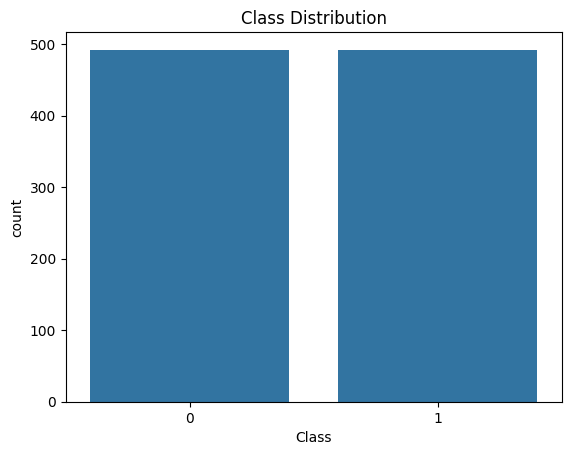

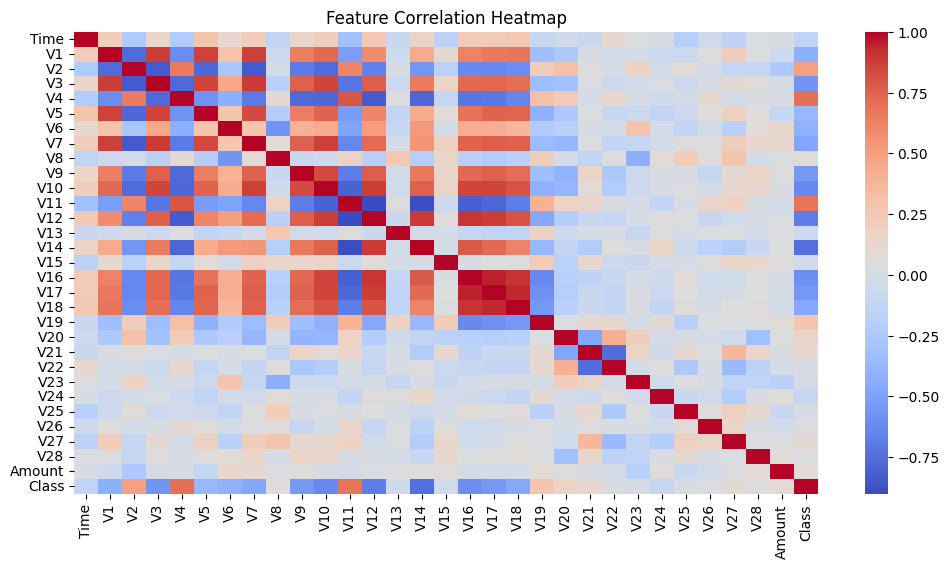

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.countplot(x='Class', data=new_dataset)
plt.title("Class Distribution")
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(new_dataset.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


Class     1.000000
V4        0.702140
V11       0.687520
V2        0.487939
V19       0.276940
V20       0.165222
V21       0.125987
V27       0.099113
Amount    0.081493
V8        0.067400
V28       0.034914
V26       0.033225
V22       0.017596
V25       0.007013
V23      -0.004724
V15      -0.039237
V13      -0.056154
V24      -0.103868
Time     -0.137710
V5       -0.372474
V6       -0.403598
V1       -0.431785
V18      -0.468852
V7       -0.474477
V9       -0.551266
V17      -0.558560
V3       -0.568259
V16      -0.598046
V10      -0.628475
V12      -0.684807
V14      -0.747137
Name: Class, dtype: float64


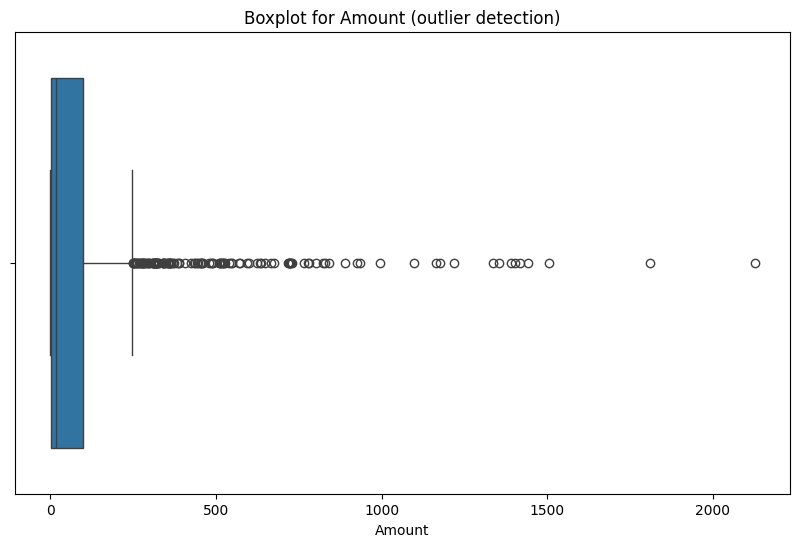

In [71]:

correlation_matrix = new_dataset.corr()
print(correlation_matrix['Class'].sort_values(ascending=False))

plt.figure(figsize=(10,6))
sns.boxplot(x=new_dataset['Amount'])
plt.title("Boxplot for Amount (outlier detection)")
plt.show()

new_dataset['log_amount'] = np.log1p(new_dataset['Amount'])


In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(Y_test, dt_predictions))


Decision Tree Accuracy: 0.9035532994923858


In [73]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(Y_test, svm_predictions))


SVM Accuracy: 0.9086294416243654


In [74]:
import numpy as np

print("Credit Card Fraud Detection\n")
print("Choose a predefined transaction profile (1–5):")

# Show menu
for i in range(5):
    print(f"{i+1}. Transaction Set {i+1}")


while True:
    try:
        choice = int(input("Your choice (1-5): "))
        if 1 <= choice <= 5:
            v_values = sample_inputs[choice - 1]
            break
        else:
            print("Please select a number from 1 to 5.")
    except ValueError:
        print("Invalid input. Enter a number.")

# Enter transaction amount
while True:
    try:
        amount = float(input("Enter transaction amount: "))
        break
    except ValueError:
        print("Invalid input. Please enter a valid number.")

time = 100000


features = np.array([[time] + v_values + [amount]])



prediction = model.predict(features)

if prediction[0] == 1:
    print("\n FRAUD DETECTED!")
else:
    print("\n Transaction is Legitimate.")


Credit Card Fraud Detection

Choose a predefined transaction profile (1–5):
1. Transaction Set 1
2. Transaction Set 2
3. Transaction Set 3
4. Transaction Set 4
5. Transaction Set 5

 Transaction is Legitimate.


C:\Users\iCare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [75]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

data = pd.read_csv("creditcard.csv")

legit = data[data.Class == 0]
fraud = data[data.Class == 1]

legit_sample = legit.sample(n=492, random_state=1)
new_dataset = pd.concat([legit_sample, fraud], axis=0)

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=1)

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1)

Y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)

print("ANN Model Accuracy:", accuracy)


Epoch 1/20


C:\Users\iCare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6288 - loss: 0.6646   
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8134 - loss: 0.5111 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.4133 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.3529 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8919 - loss: 0.2929 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9139 - loss: 0.2494 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9233 - loss: 0.2211 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9220 - loss: 0.2013 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9440 - loss: 0.1775 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.1776 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9344 - loss: 0.1726 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - 